# 🔍 Source Research for TTD Newsletter

This notebook is used to find, test, and evaluate sources of AI-related content for scraping.

👉 [📄 View source-evaluation.md](../docs/source-evaluation.md)

## Analyzing already existing most popular newsletter
Found them using Google Web search and Chat GPT (1 hour research).

In [155]:
import pandas as pd
import glob
import os
import tldextract
import matplotlib.pyplot as plt

In [ ]:
# Most popular newsletter
newsletters = [
    {"Name": "AI NEWS", "URL": "https://buttondown.com/ainews/archive/", "Comments": "Maybe to use later since this is linked to reddit posts."},
    {"Name": "The Batch", "URL": "https://www.deeplearning.ai/the-batch/", "Comments": "Links to research and promotes own learning platform."},
    {"Name": "TLDR AI", "URL": "https://tldr.tech/ai/archives", "Comments": "Very good newsletter, has reading_time."},
    {"Name": "Latent Space", "URL": "https://www.latent.space/archive", "Comments": "Few links to various sources business and technical."},
    {"Name": "The Gradient", "URL": "https://thegradientpub.substack.com/s/the-update", "Comments": "Outdated and with no sources."},
    {"Name": "Papers with Code Newsletter", "URL": "https://paperswithcode.com/newsletter/", "Comments": "Outdated, only paper sources but can be user for concepts see -> https://paperswithcode.com/methods"},
    {"Name": "Ben's Bites", "URL": "https://bensbites.com/archive", "Comments": "It has interesting but very few sources."},
    {"Name": "Superhuman AI", "URL": "https://www.superhuman.ai/", "Comments": "Has a lot of crapy sources but seems to have several ai news sources."},
    {"Name": "Data Machina", "URL": "https://datamachina.com/", "Comments": "Lot of technical very intersting links."},
    {"Name": "Last Week in AI", "URL": "https://lastweekin.ai/", "Comments": "Various interesting sources."},
    {"Name": "One Useful Thing", "URL": "https://www.oneusefulthing.org/", "Comments": "No original sources."},
    {"Name": "Deep Learning Weekly", "URL": "https://www.deeplearningweekly.com/archive", "Comments": "Very good newsletter."},
    {"Name": "IMPORT AI", "URL": "https://jack-clark.net/", "Comments": "No sources."},
    {"Name": "Alpha Signal", "URL": "https://alphasignal.ai/", "Comments": "Interesting but with no archives."}
]

df = pd.DataFrame(newsletters)
# Select newsletters based on comments
selected_newsletters = df.iloc[[2,11,8,9,13]]
print(selected_newsletters)


                    Name                                         URL  \
2                TLDR AI               https://tldr.tech/ai/archives   
11  Deep Learning Weekly  https://www.deeplearningweekly.com/archive   
8           Data Machina                    https://datamachina.com/   
9        Last Week in AI                      https://lastweekin.ai/   
13          Alpha Signal                     https://alphasignal.ai/   

                                   Comments  
2   Very good newsletter, has reading_time.  
11                    Very good newsletter.  
8   Lot of technical very intersting links.  
9              Various interesting sources.  
13        Interesting but with no archives.  


#### In the end I selected 5 newsletters that should be analyzed. 

In [289]:
# Get all .json file paths
json_files = glob.glob(os.path.join("../research/data", "*.json"))

# Load and concatenate them into a single DataFrame
df = pd.concat([pd.read_json(f) for f in json_files], ignore_index=True)

# Preview
print(f"Loaded {len(df)} rows from {len(json_files)} files.")
df.head()

Loaded 8432 rows from 4 files.


,origin_url,link_url
0,https://datamachina.com/2024/01/28/data-machin...,"https://substackcdn.com/image/fetch/f_auto,q_a..."
1,https://datamachina.com/2024/01/28/data-machin...,https://www.bluesheets.ai/
2,https://datamachina.com/2024/01/28/data-machin...,https://cmu-codegen.github.io/s2024/#schedule
3,https://datamachina.com/2024/01/28/data-machin...,https://huggingface.co/blog/AviSoori1x/makemoe...
4,https://datamachina.com/2024/01/28/data-machin...,https://interworks.com/blog/2024/01/25/making-...


#### So I scraped all the articles they are presenting and now I'm focusing on their analysis

In [292]:
def extract_domain(url):
    ext = tldextract.extract(url)
    return f"{ext.domain}.{ext.suffix}" if ext.suffix else ext.domain

df["origin_domain"] = df["origin_url"].apply(extract_domain)
df["link_domain"] = df["link_url"].apply(extract_domain)

# Looking per link_domain I was able to identify interesting and bad domains.
bad_domain_list = [
    "arxiv.org",
    "github.com",
    "twitter.com",
    "reddit.com",
    "substackcdn.com",
    "google", # GOOGLE HAS TO BE CLEANED
    "github.io", 
    "technologyreview.com", # HAVE TO PAY FOR THE CONTENT
    "wired.com", # HAVE TO PAY FOR THE CONTENT
    "substack.com",
    "youtube.com",
    "openreview.net",
    "ashbyhq.com",
    "nytimes.com", # HAVE TO PAY FOR THE CONTENT
    "nature.com", # HAVE TO PAY FOR THE CONTENT
    "kaggle.com",
    "reuters.com", # HAVE TO PAY FOR THE CONTENT
    "paperswithcode.com",
    "tldr.tech",
    "cirrascale.com",
    "gitconnected.com",
    "plainenglish.io",
    "baseten.co",
    "together.ai",
    "a16z.com",
    "waymo.com",
    "betterprogramming.pub",
    "stateof.ai",
    "datadriveninvestor.com",
    "tekhnoal.com",
    "anyscale.com"
    "snorkel.ai"
]


In [291]:
domain_counts

link_domain
arxiv.org              1125
github.com              908
venturebeat.com         283
twitter.com             265
huggingface.co          229
                       ... 
warp.dev                  1
creativebloq.com          1
threadreaderapp.com       1
elevenlabs.io             1
unbox.ai                  1
Name: count, Length: 722, dtype: int64

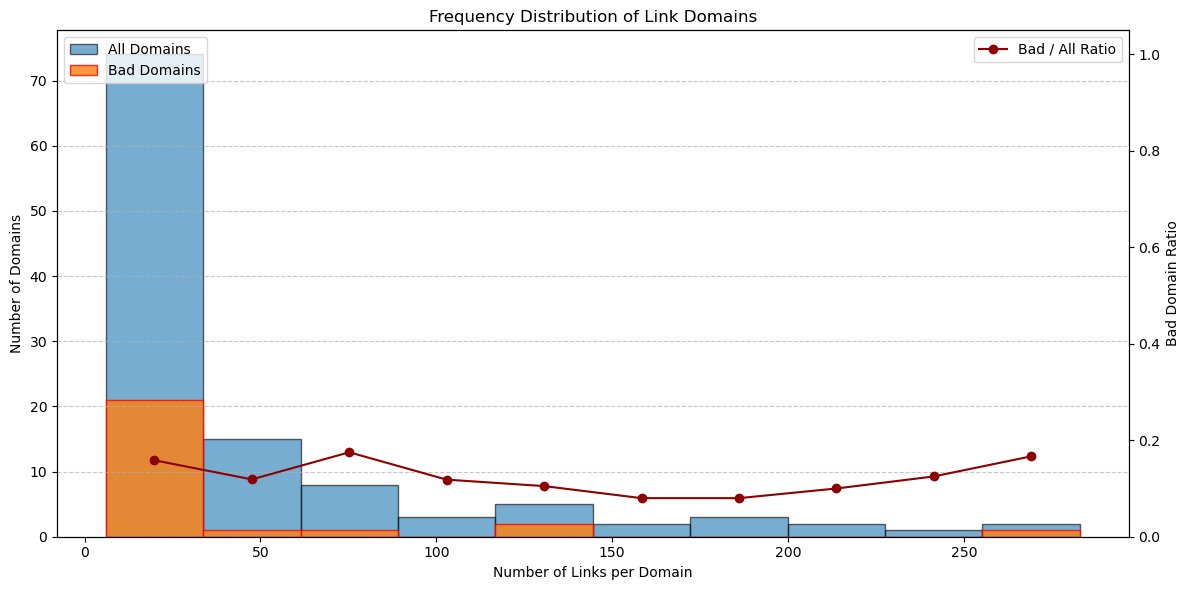

In [327]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_link_domain_distribution(
    domain_counts,
    bad_domain_list=None,
    min_links=0,
    max_links=float("inf"),
    bins=20,
    title="Frequency Distribution of Link Domains"
):
    """
    Plots a histogram of link_domain frequencies, highlighting bad domains and showing bad/all domain ratio.
    """
    # Filter domains
    filtered_counts = domain_counts[
        (domain_counts > min_links) & (domain_counts < max_links)
    ]

    # Bad domains subset
    bad_counts = pd.Series(dtype=int)
    if bad_domain_list:
        bad_counts = filtered_counts[filtered_counts.index.isin(bad_domain_list)]

    # Prepare plot
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # All domains histogram
    counts_all, bin_edges, _ = ax1.hist(
        filtered_counts,
        bins=bins,
        edgecolor='black',
        alpha=0.6,
        label="All Domains"
    )

    # Bad domains histogram (use same bins)
    if not bad_counts.empty:
        counts_bad, _, _ = ax1.hist(
            bad_counts,
            bins=bin_edges,
            edgecolor='red',
            alpha=0.8,
            label="Bad Domains"
        )
    else:
        counts_bad = np.zeros_like(counts_all)

    # Axis formatting
    ax1.set_xlabel("Number of Links per Domain")
    ax1.set_ylabel("Number of Domains")
    ax1.set_title(title)
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    ax1.legend(loc="upper left")

    # Calculate bad-to-all domain ratio per bin
    ratio = pd.Series(
        np.divide(
            counts_bad,
            counts_all,
            out=np.zeros_like(counts_bad, dtype=float),
            where=counts_all != 0
        )
    ).rolling(window=5, center=True, min_periods=1).mean().values
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    # Plot ratio on secondary axis
    ax2 = ax1.twinx()
    ax2.plot(bin_centers, ratio, color='darkred', marker='o', linestyle='-', label="Bad / All Ratio")
    ax2.set_ylabel("Bad Domain Ratio")
    ax2.set_ylim(0, 1.05)
    ax2.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

plot_link_domain_distribution(
    domain_counts,
    bad_domain_list=bad_domain_list,
    min_links=5,
    max_links=300,
    bins=10,
    title="Frequency Distribution of Link Domains"
)

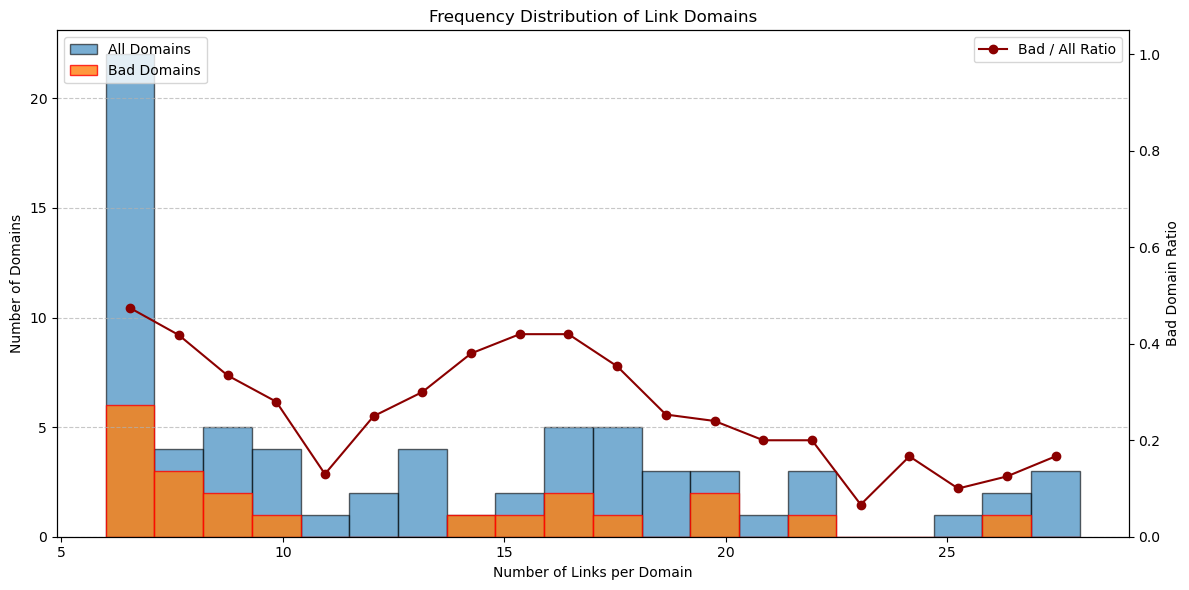

In [ ]:
plot_link_domain_distribution(
    domain_counts,
    bad_domain_list=bad_domain_list,
    min_links=5, # min threshold
    max_links=30,
    bins=20,
    title="Frequency Distribution of Link Domains"
)

You can see that there are more and more bad domain names when they have less and less links attached to them. **It justifies that we stop to look for domains that appears less than 5 times**.

## We have now our domain_list that we will use to scrap automatically our articles

In [346]:
min_links=5, # min threshold
max_links=np.inf
filtered_counts = domain_counts[
        (domain_counts > min_links) & (domain_counts < max_links)
    ]
filtered_counts = filtered_counts[~filtered_counts.index.isin(bad_domain_list)]
good_articles = df[df["link_domain"].isin(filtered_counts.index)]
good_articles.describe()

,origin_url,link_url,origin_domain,link_domain
count,4474,4474,4474,4474
unique,322,3197,4,89
top,https://www.deeplearningweekly.com/p/1349446_d...,/ai/advertise,deeplearningweekly.com,venturebeat.com
freq,26,20,4105,283


In [351]:
for domain, count in good_articles.link_domain.value_counts().items():
    print(f"{domain}: {count}")

venturebeat.com: 283
huggingface.co: 229
towardsdatascience.com: 220
siliconangle.com: 207
nvidia.com: 194
medium.com: 191
techcrunch.com: 179
googleblog.com: 164
mit.edu: 152
facebook.com: 143
tensorflow.org: 122
comet.ml: 117
pytorch.org: 107
openai.com: 107
theverge.com: 103
google.com: 87
ieee.org: 86
thegradient.pub: 84
comet.com: 84
neptune.ai: 84
apple.com: 78
thenextweb.com: 78
amazon.com: 61
mlops.community: 50
fritz.ai: 48
meta.com: 47
anthropic.com: 45
eugeneyan.com: 45
philschmid.de: 44
syncedreview.com: 43
deepmind.com: 42
stanford.edu: 41
: 40
research.google: 38
blog.google: 38
microsoft.com: 37
edgeimpulse.com: 33
llamaindex.ai: 31
huyenchip.com: 30
cnbc.com: 28
lightning.ai: 28
deepmind.google: 27
analyticsindiamag.com: 26
deepset.ai: 25
freedium.cfd: 22
weaviate.io: 22
forbes.com: 21
quantamagazine.org: 20
hackster.io: 19
mckinsey.com: 19
mistral.ai: 19
arm.com: 18
machinelearningmastery.com: 18
marktechpost.com: 17
stability.ai: 17
berkeley.edu: 16
cohere.com: 16
dag

In [354]:
for url in good_articles[good_articles.link_domain == "venturebeat.com"].link_url:
    print(url)

https://venturebeat.com/ai/google-deepmind-open-sources-alphafold-3-ushering-in-a-new-era-for-drug-discovery-and-molecular-biology/
https://venturebeat.com/ai/ai-video-rivalry-intensifies-as-luma-announces-dream-machine-api-hours-after-runway/
https://venturebeat.com/ai/nvidias-llama-3-1-minitron-4b-is-a-small-language-model-that-punches-above-its-weight/
https://venturebeat.com/games/nvidia-helps-launch-ai-platform-for-teaching-american-sign-language/?utm_source=tldrai
https://venturebeat.com/ai/nous-research-just-launched-an-api-that-gives-developers-access-to-ai-models-that-openai-and-anthropic-wont-build/?utm_source=tldrai
https://venturebeat.com/ai/cohere-releases-coral-ai-assistant-designed-for-enterprise-business-use/
https://venturebeat.com/ai/pinecone-leads-explosion-in-vector-databases-for-generative-ai/
https://venturebeat.com/ai/cohere-releases-coral-ai-assistant-designed-for-enterprise-business-use/
https://venturebeat.com/2022/01/17/new-startup-shows-how-emotion-detecting